# **1. Import PGdet**

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolTransforms import SetBondLength, SetAngleDeg
from pointgroup import PointGroup
from rdkit.Chem import rdMolTransforms as rdmt
import numpy as np
import matplotlib.pyplot as plt

from PGdet import calculate_angle, pg_check_smiles, config_mol, molecule_angles, molecule_bonds
from PGdet import plot_molecule, atom_mapping, atom_mapping_interface, count_atoms

Now that the functions and the libraries are imported, let's get started! 

*Further indication: if the code is run in conda or in spyder, the molecule can be plotted. The graph of the molecule can then be moved to get a better glance at it. Jupyter Notebook does not offer such functionalities, but we will provide you with pictures of different angles of the molecules. The way to print the graph of the molecule will be explained.*

# 1.1 Introduction

The point group of a molecule is something that tells a lot about the look of the molecule. It can be useful various domains, such as spectroscopy, to predict the absorption spectrum of a compound. However, after looking for datasets of point groups on internet, we did not find any ressources of that kind. It also appeared that rdkit does not have a function that is able to determine a point group. Our goal was to make a function that could actually determine efficiently and accurately the point group of a molecule. Our goal was to make such determination easy. We created PGdet ( *which stands for Point Group determination* ), an ensemble of functions, so that with only a simple smiles, you can have the point group of your molecule. To have the highest accuracy possible, PGdet only takes purely organic molecules. Organo-metallic or inorganic molecules cannot yet be used, although the code supports some very common inorganic molecules such as ammonia and water. Let's see how it works!

# **2. Main functions**

# 2.1 Atom_mapping

Before using the functions of the package, let's introduce you to the most important functions, starting with atom_mapping. This function takes all the information calculated and found from the smiles. It uses the library pointgroup. Then, it will gather the information, and according to its parameters, it will plot the molecule, print all information about the molecule, and/or just give back the point group.

Let's start with simples molecules. Methane ( *smiles: 'C'* ) and water ( *smiles: 'O'* ) are perfectly suited for this.

In [2]:
atom_mapping('C')

'Td'

In [3]:
atom_mapping('O')

'C2v'

It seems that the results are correct but also quite raw. The function atom_mapping has some other functionalities that will be interesting later. For the results to be more pleasing, you can use another function called atom_mapping_interface. We will see later how it works.

There are other functionalities of atom_mapping. The function can take two more arguments, which are boolean. The first, if True, will print lots of information. All The information that the function is able to give are:

- A list of all atoms of the molecule in order
- The coordinates of each atom in space, given in the same order
- A list of tuples of each of the two atoms bonded together (the numbers corresponds to the index of the atom in the list of atoms)
- A list of bond length following the list of bonds order (should be = 1 except if the atoms are in a cycle)
- A list of angles between atoms (a, b, and c) and the value associated with the trio

The third argument is also a boolean. If true, it will use the function called plot_molecule and will plot the 3D representation of the molecule using matplotlib. As default, the two boolean are set as false so that if you run the function with just the string, you will get just the point group back0 You can try this with running the following cell.

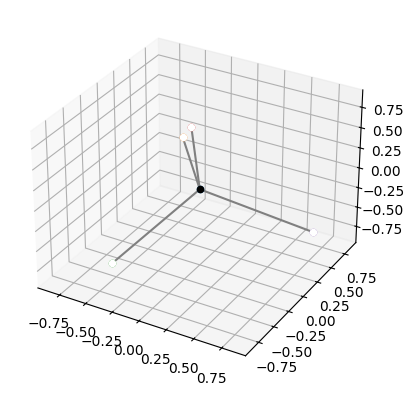

Molecule SMILES : C
Molecule point group : Td
Atoms list : ['C', 'H', 'H', 'H', 'H']
Coordinates : [[ 1.34738378e-07 -2.08266479e-07  1.48335424e-07]
 [-6.18686324e-01  7.81753195e-01 -7.80298564e-02]
 [-3.60904772e-01 -7.65754497e-01 -5.32323077e-01]
 [ 7.84531123e-02 -2.68472721e-01  9.60087457e-01]
 [ 9.01631717e-01  2.53393185e-01 -3.50502746e-01]]
Bonds : [(0, 1), (0, 2), (0, 3), (0, 4)]
Bond lenghts (normalized) : [1.0000000000000002, 1.0, 1.0, 1.0000000000000002]
Angles : [(0, 2, 1, 109.5), (0, 3, 1, 109.47118294350612), (0, 4, 1, 109.41368200127378), (0, 3, 2, 109.5), (0, 4, 2, 109.4424282241003), (0, 4, 3, 109.5)]



'Td'

In [4]:
atom_mapping('C', True, True)

As you can see, the information the function provides are useful if you want to have a deeper understanding of the function. However, understanding is not required to manipulate the function and have good results with it. One of the goals of this project was also to make using the function as simple as possible.

One other hidden feature of atom_mapping, is that it will correct point groups that does not really exist, such as $C_{1v}$ or $C_{1h}$. These actually correspond to $Cs$. The problem comes from the library pointgroup.

The last potentially useful feature of atom_mapping, is that, rather than a string, you can use a list of strings as input. The function will provide you with a list of point groups. You can run the following cell and see how it works.

In [5]:
atom_mapping(['C','CCO','N=N'])

['Td', 'Cs', 'C2h']

Such feature could be useful if you want to use a lot of data. You can put a large amount of smiles in the function via a list. You can make a large database with very little information. However, if only one of the smiles corresponds to a too long molecule, the code will rise an error. To avoid that, you can use count_atoms, a very simple function counting the non-hydrogens of a molecule. We will see how it works later.

# 2.2 Atom_mapping_interface

In [ ]:
atom_mapping_interface()

As you can see, the function does not take any arguments because it will ask for them. After answering, it will call atom_mapping and give back the point group. Did you see it? It also asks if you want the molecule to be plotted or if you want some more information. These correspond to the two booleans of atom_mapping. The function will also take all the smiles you wrote and put them in a list in order to use them.

Atom_mapping_interface is also able to detect if the answers are not specifically y or n. The function is simply an interface, making calling the function easier and the results more pleasant.

Here is why PGdet can be useful even if you don't look for the symetry point group of a molecule. The code is able to give lots of potentially useful informations. It is also able to produce a highly symetric confomer, which is not possible that easilly with rdkit. This can be seen with triphenylphosphine ( *smiles: C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3* ). 

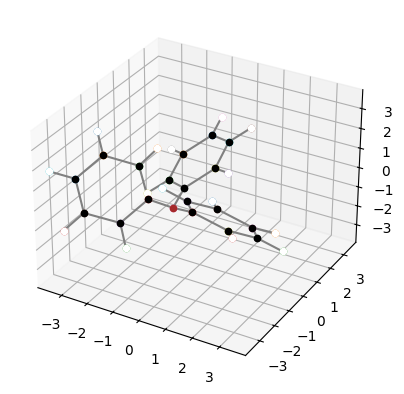

'C3'

In [6]:
atom_mapping('C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3', False, True)

The problem with rdkit is that to generate such a conformer, one will use optimizing functions. However, such functions will optimize the 3D conformer to achieve the lowest energy possible, which is *not always* a high-symmetry conformer. There is no rdkit function that maximizes the symmetry of the molecule. To compensate for this, the PGdet package includes a function called "config_mol". We shall now take a closer look at its functionalities.

# 2.3 Config_mol, plot_molecule and molecule_angles

Foremost, let's generate a conformer of a molecule and optimize it with rdkit. Then, we will create another conformer optimized with config_mol and compare them. To compare them, we will use plot_molecule, a Matplotlib-based function that prints the molecule in 3D. We will also use other functions, less important, that calculate angles between substituent of the carbons. Run the following code. Once done, you can run it another time. You can see one of the main issues with rdkit: the atoms are not placed consistently in space, their positions varying between each run. It may not be that visible with toluene, but if you try with methane instead ( *smiles: 'C'* ), it will be obvious. To see this effect, you should run multiple times the cell. Hopefully, such things do not happen with PGdet.

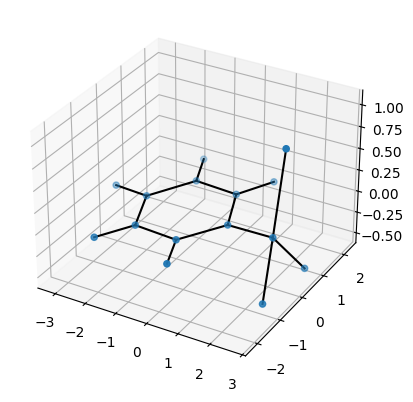

Point group:  C1


In [7]:
# let's look at toluene, which smiles is: C1=CC=CC=C1(C)
# We start with creating a rdkit object, add its hydrogens:   
mol = Chem.MolFromSmiles("C1=CC=CC=C1(C)")
mol = Chem.AddHs(mol)
# We also optimise the confomer using built-in rdkit functions:
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
# To plot the molecule, we need to get some more data about the molecule:
# We find the position of each atom:
conformer = mol.GetConformer()
positions = conformer.GetPositions()
x = [pos[0] for pos in positions]
y = [pos[1] for pos in positions]
z = [pos[2] for pos in positions]
# Generates a 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
atom_pairs = []
#Draw atoms
ax.scatter(x, y, z)
#We need to find and plot the bonds:
for bond in mol.GetBonds():
    start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
    atom_pairs.append((start, end))
    ax.plot([x[start], x[end]], [y[start], y[end]], [z[start], z[end]], 'k-')
    
# We can now plot the molecule...
plt.show()

#... and use PointGroup to find its point group with the current data:
pg = PointGroup(positions=positions, symbols=[atom.GetSymbol() for atom in mol.GetAtoms()])
print('Point group: ', pg.get_point_group())


As we can see here, the code is compact, but the result is disappointing. The real point group of toluene is $Cs$ and the representation seems geometrically incorrect. If we measure the angles between carbon substituent, we will find that none of them are at $109.5°$. The other $sp^2$ carbons have quite accurate angles however. We can verify it that way using another function of PGdet:

In [8]:
print(molecule_angles(positions,atom_pairs))

[(1, 2, 0, 120.06639958764116), (5, 0, 1, 120.43129737120255), (0, 7, 1, 119.25275390286343), (1, 8, 0, 119.94094238937163), (2, 3, 1, 119.92025239952902), (1, 8, 2, 119.99242206975836), (2, 9, 1, 120.03959929998051), (3, 4, 2, 120.0663992768549), (2, 9, 3, 120.03963652704655), (3, 10, 2, 119.99241164672688), (4, 5, 3, 120.43129699150396), (3, 10, 4, 119.9409530871355), (4, 11, 3, 119.2527717763232), (5, 6, 4, 120.43547235490512), (5, 0, 4, 119.07320178759038), (4, 11, 5, 120.31591168951424), (5, 0, 6, 120.43545839258596), (6, 12, 5, 110.89872790387125), (6, 13, 5, 110.89877702098809), (6, 14, 5, 109.99224807482999), (0, 7, 5, 120.31592923109167), (6, 13, 12, 107.22250554910323), (6, 14, 12, 108.8753140219951), (6, 14, 13, 108.8755288185115)]


Molecule_angles give a list of tuples as an output. The first three numbers of the tuple are the ids of the three atoms. The function will then measure the angle between the three substituants. As you can see, some carbon atoms of the molecule are $sp^2$ and therefore, we get angles close to $120°$. The $sp^3$ carbon atom has angles quite far from the $109.5°$ wanted. As you can see, the code on top works quite well but is not efficient enough. In order to determine the point group of a molecule, we need very precise and accurate angles. A slight imprecision and the point group instantly becomes $C_1$. Rdkit does well with small molecules. When it comes to larger ones, the small imprecisions adds together and makes almost impossible to find the accurate point group. Now, let's try the same thing with PGdet's functions. 

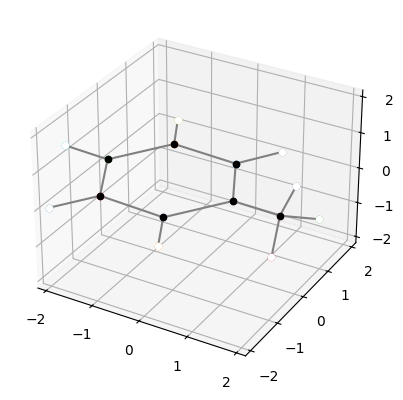

Molecule SMILES : C1=CC=CC=C1(C)
Molecule point group : Cs
Atoms list : ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
Coordinates : [[ 0.08422506  1.2039471  -0.02485751]
 [-1.30928009  1.28691661 -0.02604509]
 [-2.0779377   0.12455183 -0.01152241]
 [-1.45382256 -1.12132763  0.00852425]
 [-0.06039519 -1.20559498  0.00973171]
 [ 0.72050208 -0.04352731 -0.01968367]
 [ 1.71844697 -0.1030843   0.00395841]
 [ 0.6238824   2.04582391 -0.02851521]
 [-1.75599727  2.18155038 -0.0346582 ]
 [-3.07614137  0.18446377 -0.01155171]
 [-2.00433251 -1.95599884  0.0247339 ]
 [ 0.37470758 -2.10572264  0.03108061]
 [ 2.11110649  0.68025427 -0.4779121 ]
 [ 2.00601531 -0.94930418 -0.44461307]
 [ 2.03388687 -0.10444575  0.95290299]]
Bonds : [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (5, 0), (0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (6, 12), (6, 13), (6, 14)]
Bond lenghts (normalized) : [1.3959734751717172, 1.3936058660732604, 1.3936058291755502, 1.3959735884946023, 1.4003810

'Cs'

In [9]:
atom_mapping('C1=CC=CC=C1(C)', True, True)

You can also try with cyclobutadiene (*smiles: C1=CC=C1*). Again, atom_mapping will find the correct point group ($D_{4h}$) while the other code will miss.


Plot_molecule is a function that needs:
1. the positions of each atom
2. a list of each atom
3. a list of tuples, each tuple being the tag of two atoms bounded together.
  
The function will then place the atoms in space, colour them as a function of their nature. It will also draw grey lines as bonds. To avoid the deformation of the molecule, it will also set the size of the graph so that it fits the size of the molecule. The last thing that it does is that it centres the molecule.

There are some other useful features that are yet to be shown. For example, you may have seen that plot_molecule associates colours with atoms. That way, a printed organic molecule is easier to visualise. The colours chosen correspond to our usual idea of them, with carbons being black, oxygens red or nitrogens blue. If an atom is unusual, its colour will be grey.

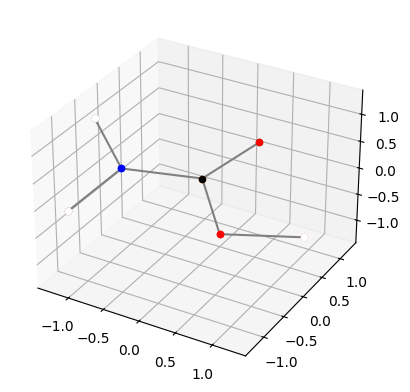

'Cs'

In [10]:
atom_mapping('NC(=O)O', False, True )

PGdet provides you a function called config_mol. This function is really important to the code, although its implication is only visible with atom_mapping. This function will make sure all carbon atoms has its substituents separated by the right angle. For example, $sp^3$ carbons must have $109.5°$ angles between its substituents. It modifies the angles for all substituents of all carbon atoms. That way, the molecule is more accurately represented, and the point group is found accurately. However, after modifying these, we found that the point group was not correct. So we found out that the problem could come from the fact that dihedral angles were probably not corrects either. A dihedral angle is well represented by the following image :

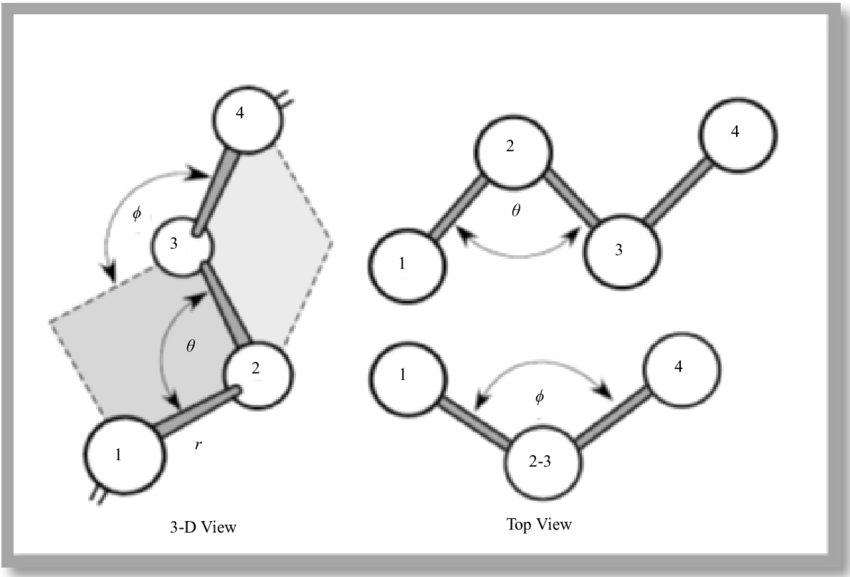

( *source: https://www.researchgate.net/figure/a-Se-chain-molecules-and-the-definition-of-the-dihedral-angle-The-dihedral-angle-is_fig1_276170064* )

A dihedral angle is calculated from four atom positions in space. Since PGdet only determines point group of organic molecules, all dihedral angles are set to equal $60°$. Obviously, it only modifies dihedral angles if one of the atoms is a carbon atom and as long as it is not part of a ring. 

# 2.4 Count_atoms, pg_check_smiles and molecule_bonds

These are the last functions of PGdet's package. They are mainly done for calculations. Count_atoms simply counts the number of non-hydrogen atoms in the molecule, so that if a user asks for a molecule exceeding the limit of 25 atoms within the molecule (without counting the hydrogens, obviously). Pg_check_smiles ensures that "smiles" do not transgress any established rules ( *25 atoms limit, purely organic* ). Molecule_bonds creates a list of tuples. Each tuple is composed with two number, each one being the ID of an atom of the molecule. The ID starts from 0 and ends at $n-1$ with n, and corresponds to the position of the atom in the list of all atoms. The last function, moecule_bonds, sets all bonds to have the same length ( *except if the atom is in a cycle* ) so that some inaccuracies can be easily avoided.

In [11]:
print(count_atoms('CCC'))
print(count_atoms('N3[C@@](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@]([H])(CC1=CN=C-N1)C3(=O)'))

3
24


Count_atoms is fairly simple to use. It can be a very useful function to use if you want to use atom_mapping on a larger sample, to make sure that there are no invalid smiles ( *with too much atoms* ). Let's see an example of a use of molecule_bonds now. This function is not very useful on its own, but is crucial for other functions. It also sets the bondlength to 1 for atoms that are not in a cycle. This makes sure that some

In [12]:
mol, conf = config_mol('CCO')
coords = conf.GetPositions()
print(molecule_bonds(mol, coords))
print([atom.GetSymbol() for atom in mol.GetAtoms()])

([(0, 1), (1, 2), (0, 3), (0, 4), (0, 5), (1, 6), (1, 7), (2, 8)], [1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999998, 1.0000000000000004, 0.9999999999999998])
['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']


In this case, we have ethanol as molecule. The numbers 0 and 1 corresponds to the two carbons and 2 is the oxygen ( *this can be verified with the number of bonds they form or by printing the atom list* ) the other numbers are hydrogens.

Now comes pg_check_smiles, a function that ensures that the smiles is correct. This function checks if the smiles corresponds to a molecule that exists. It makes sure that the molecule is purely organic or that it is allowed ( *you can find the allowed inorganic molecules by looking at the error message that the function will rise if you run purely inorganic molecules, this will be mentioned later* ). If the smiles input is not a string or a list of smiles, it will tell you that there is a problem. If your molecule is an organometallic molecule, it will also raise errors since these kinds of molecules are banned. 

In [13]:
pg_check_smiles(42)

TypeError: Invalid SMILES class. SMILES must be a string or a list of strings.

The other errors that you can get will be studied in more details in the next part, which will also explain why we chose to limit the functions that way.

# **3 Limitations and issues with specific molecules**

PGdet is a simple way to find point groups of purely organic molecules. But why are they specifically only purely organic ? Let's dive in the limitations of libraries and of PGdet itself.

# 3.1 Inorganic and organo-metallic molecules

If you try to use atom mapping on organo-metallic or inorganic molecules, the function will rise an error. Let's try with Ferrocene ( *Iron, bis(eta5-2,4-cyclopentadien-1-yl), smiles:[CH-]1C=CC=C1.[CH-]1C=CC=C1.[Fe+2]* ).

In [14]:
atom_mapping('[CH-]1C=CC=C1.[CH-]1C=CC=C1.[Fe+2]', False, True)

TypeError: Error: the smiles corresponds to an organometallic complex, which is not suited by the program.

The functions are not suited to handle complexes or charged molecules. Here, you can see that the complex is rejected. The reason why is simple. If for purely organic molecules, fixing all angles and dihedral angles was doable, the same thing couldn't be said for metals and lanthanides. The reason why is that they have d orbitals as outer orbital. This makes them much harder to predict when it comes to shapes of the molecule. Then, to patch this, we have to change the code so that it is able to find crystals point groups. It should also be able to determine the shape of an organo-metallic molecule based on the nature of the metal and its ligands. Same problems happened when it comes to purely inorganic compounds. Let's have a look at $SF_6$, an octahedral molecule. ( *smiles: S(F)(F)(F)(F)(F)F* ).

In [16]:
atom_mapping('S(F)(F)(F)(F)(F)F')

TypeError: Error: The smiles input corresponds to an inorganic molecule. No molecule could be printed. The molecule should be purely organic or be an exception: ['O', 'N', 'NN', 'O=O', 'N=N', 'N#N', 'OO', 'F', 'FF', 'Cl', 'ClCl', 'Br', 'BrBr', 'I', 'II', 'ClI', 'ICl']

Another error is raised. This is because the atoms are not placed in space correctly. The molecule is obviously not octahedral. You can try yourself with the smiles and the code upwards, you will see that the result is somewhat chaotic. Some inorganic are still working though, it is the case of the sulphur crown $S_8$ ( *smiles: S1SSSSSSS1* ), which should yield a point group of $D_{4d}$. However, rather than selecting one by one the inorganic molecules that were working, we decided to choose some very common such as water, ammonia and hydrochloric acid and forbid the other ones.

Organo-metallic and purely inorganic molecules does not have the same angles as organic molecule. Changing the molecule so that the conformation manually changed is accurate becomes a nightmare to code. 

# 3.2 Limitations of the size of the molecules and rdkit conformer inaccuracies

The size of the molecule is limited. If your molecule is composed with more than 25 non-hydrogen atoms, the code will raise an error and tell you that the molecule is too large. Let's try it.

In [17]:
atom_mapping('CCCCCCCCCCCCCCCCCCCCCCCCCC')

TypeError: Error: The smiles input is too long. Maximum non hydrogen atoms allowed : 25

The code is helped by another function yet not mentioned. Count_atoms is a simple function that just counts the number of atoms in the molecule. The value is then used by pg_check_smiles to make sure that the function does not run if there are too many atoms. That way, even if the smiles are very long, ( *len(smiles) >> 25* ) the code will still run.

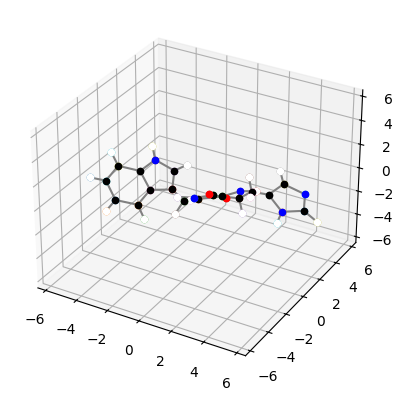

'C1'

In [18]:
atom_mapping('N3[C@@](CC(=CN2)C1=C2C=CC=C1)C(=O)N[C@@]([H])(CC1=CN=C-N1)C3(=O)', False, True)

This size of molecule is a limit. If the molecule is larger, PGdet will start to struggle to find the point group of it. Even at this size, some imprecisions can be seen. We will see what it is all about. Here, we can see that we do not see clearly the central part of the molecule because Jupyter notebook does not allow movement of the graph. We invite you to try using PGdet with an interface able to properly use Matplotlib.

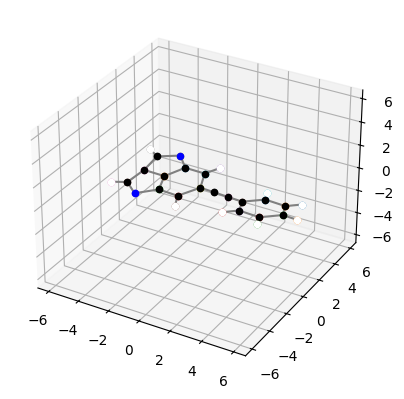

'C2'

In [19]:
atom_mapping('C1=CC=CC=C1C#CC2=CC4=C3C(=C2)N=CC3=C[N]4', False, True)

It appears that this molecule is $C_2$ according to atom_mapping. This is not accurate. There is a higher symmetry conformer of this molecule that is $C_{2v}$. The problem here can be seen from a different angle:

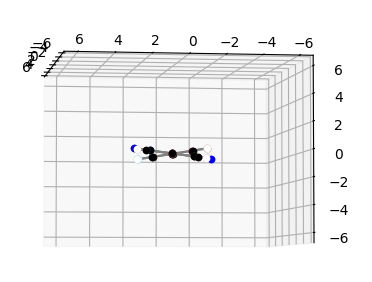

By having a look at the molecule from another angle, the problem is obvious. With a triple bond between the two carbons, the molecule should be perfectly flat. However, since config_mol does not modify the angles more than dihedral angles, it does not correct the drift between the two cycles. Config_mol does not modify angles for chains of atoms longer than 4. Therefore, the imprecisions of rdkit are the only responsible for this mistake. 

Changing these angles is fairly hard. What happened here is even more obvious when we look at 6 atoms alkanes.

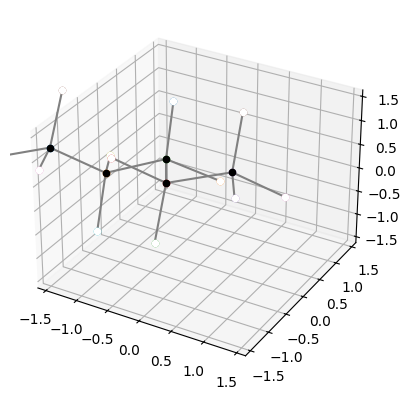

'C1'

In [20]:
atom_mapping('CCCCC', False, True)

As you can see here, when it comes too long carbon chains, the representation is not correct. This is because, PGdet uses rdkit first to get the conformer and then modifies it. However, it changes the angles, not the overall conformer. In other words, the angles are corrected, not the general shape of the molecule. We get molecules like this one that are supposed to be perfectly linear, but are not.

It becomes more obvious from another point of view:

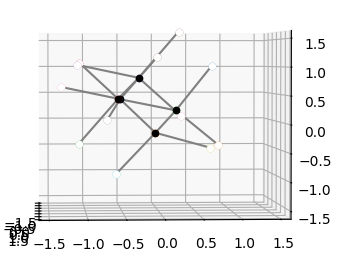

Two things can be denoted from here. First, the carbons are not aligned and do not form a straight chain. Otherwise, we would see two black dots. The other observation we can make is the following. Some hydrogens, that should align perfectly, are not in superposition. This is caused because of the perspective imposed with Matplotlib. This is a factor that you should not forget. Sometimes the molecule seems wrongly represented. The reason is sometimes the perspective. Here is why we recommend using the package with a medium that allows to move the graphic. We recommend to use spyder or conda because these are the ones we tested the code with.

# 3.3 Inaccuracies of heteroatoms

Some heteroatoms can have hydrogens bonded to them. The most common ones in organic molecules are oxygens and nitrogens. The problem with these hydrogens is that they are almost never placed well. Benzaldehyde for example ( *smiles: C1=CC=CC=C1(C=O)'* ) sees its hydrogen wrongly placed. It results in a $C_1$ output of the function. This result is wrong because benzaldehyde should be completely flat. PGdet struggles when it comes to bonding organic functions or organic groups together. Benzaldehyde could be cut into two pieces, a benzene ring and a "formaldehyde". 

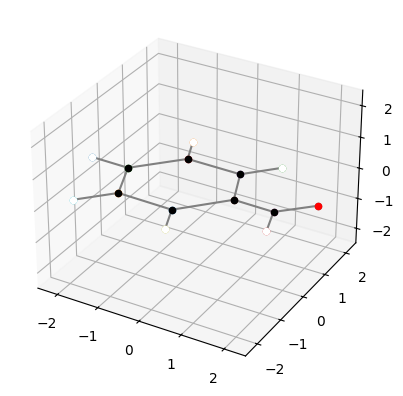

'C1'

In [21]:
atom_mapping('c1ccccc1(C=O)', False, True)

This result is wrong because benzaldehyde should be completely flat. PGdet struggles when it comes to bonding organic functions or organic groups together.

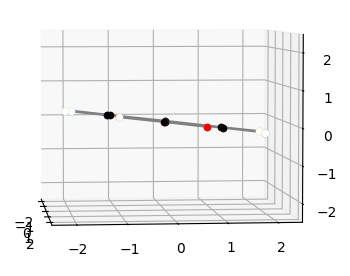

The difference in angle is almost not visible. We should not forget that there is also a deformation of the molecule due to perspective. The library point group requires a very high precision in the position of the atoms in space. Let's try to decompose the molecule. Benzaldehyde could be cut into two pieces, a benzene ring and a formaldehyde. 

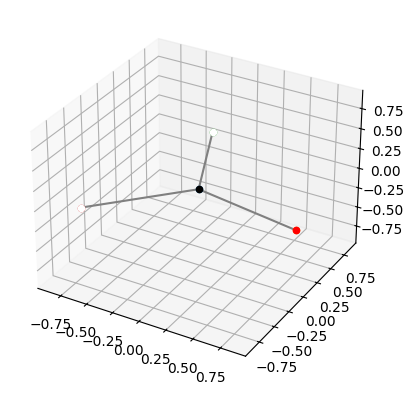

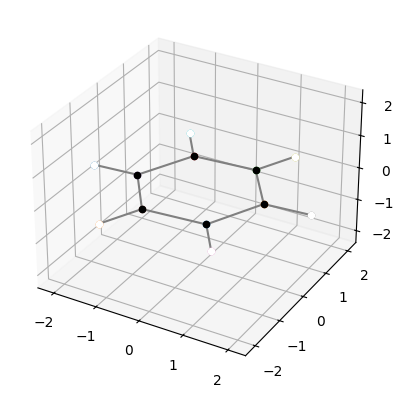

['C2v', 'D6h']

In [22]:
atom_mapping(['C=O', 'c1ccccc1'], False, True)

Both alone are true. The results are corresponding to what was said earlier. The same result can be observed with caffeine, supposed $C_s$ but appears $C_1$, although the graph looks very much like $C_s$ ( *smiles: 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'* ). The fact that for such little inaccuracies, the point group is false is quite annoying. The function provided by the point group library allows modifying the precision of the function that determine the point group. However, changing slightly the tolerance and all molecules become $C_{infinity, v}$. 

# **4. Conclusion**

As we have seen, PGdet features an ensemble of functions. They all either provide information or either modify the conformer so that the point group can be determined. To get the most accurate and highest symmetry conformer, PGdet provides functions that modify and optimise the conformer, using rdkit. Atom_mapping, which is the main function of PGdet, also allows you to get lots of useful information such as the angles of the bonds. That way, coupling this with the plotting capabilities of PGdet, you can see the conformer produced. If the point group given seems strange, you can still look at the molecule to convince yourself about the answer. 

PGdet has some ways of improvements that may come later in new updates ! The ways the code can be improved were already said earlier. By fixing the way the initial conformer is placed, the code could be improved a lot. Another way to get better results with exotic molecules such as purely inorganic ones or organo-metallic complexes would be to create functions that modify the angles between ligands of metals ( *for organometallic for example* ). Such thing is quite hard to do but may arrive soon. Another way to improve the quality of the output would be to also print the symmetry operations associated with the determined point group. 
Thank you for giving interest in our project in the first place, we hope you will find some interesting uses of our package. If you get strange results, feel free to ask the team by rising an issue on our GitHub, we will be more than happy to help.

Here is a **bonus**: now that we have been through all the functionalities of the package, you can try it here simply by running the following cell. You can play with it if you want. Try the following smiles, the results will probably impress you ( *don't forget that you can use multiple smiles when running the function* ): 

1. Hexane: 'CCCCCC'
2. Cubane: 'C12C3C4C1C5C2C3C45'
3. Ethanol: 'CCO'
4. Benzene: 'c1ccccc1'
5. Ammonia: 'N'
6. Iodomethane: 'CI'
7. The total list that can be put rather than each smiles: ['CCCCCC','C12C3C4C1C5C2C3C45','CCO','c1ccccc1','N','CI']

In [ ]:
atom_mapping_interface()